# Case study: Belgium running on an alternative monetary system
In order to get an idea of the effect of implementing the monetary system proposed in Kuypers, 2024 on a real economy, a simulation is run based on real monetary and financial data from Belgium over the year 2023. This data includes the size of the population, the average M2 money stock, and the total expenses made by the government. From these expenses, the interest cost, unemployment cost and pension cost are subtracted. Interest cost is subtracted because with the proposed monetary system no interest on debt needs to be paid. Unemployment costs and pension costs are subtracted because they are replaced with a guaranteed income of 2000€ per capita. Taxes are collected through a demurrage like mechanism.

Several scenarios with different demurrage and tax settings settings are run.

For each scenario, the two extremes, and one intermediate case, of tax expenditure are simulated:  
* All taxes are distributed evenly among the population.
* All taxes are distributed evenly among 50% of the population. These receiving actors are fixed.
* All taxes are allocated to one actor in the population. The actor receiving these taxes is fixed.

## 1. Base scenario - flat demurrage and tax
The simplest scenario is to calculate a flat demurrage and tax percentage so that the money stock remains stable and all expenses can be paid by the collected taxes.  
With a given monthly guaranteed income ($GI$), fixed population ($P$) and known money stock ($M$), monthly demurrage ($d$) can be calculated as follows: $d = \frac{GI}{M/P}$. The monthly tax percentage ($t$) can, given the monthly expenses ($E$), be calculated as follows: $t = \frac{E}{M / P}$.

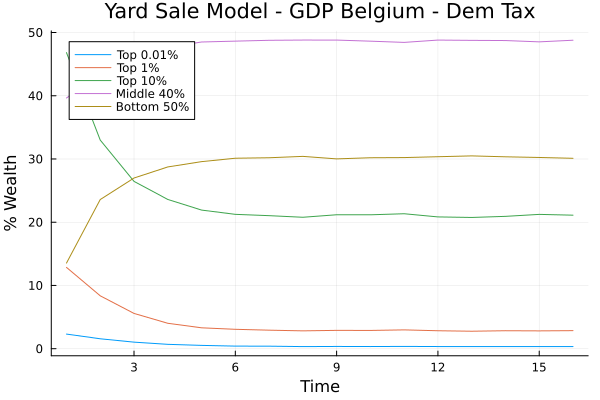

In [1]:
using EconoSim
using MoneySim

d_data = simulate_belgium(tax_type = DEMURRAGE_TAX, tax_brackets = DEM_TAX)

d_dfa = analyse_wealth(d_data)

plot_wealth(d_dfa[1],
            [TOP_0_1, TOP_1, TOP_10, HIGH_MIDDLE_40, BOTTOM_50],
            title = "Yard Sale Model - GDP Belgium - Dem Tax",
            labels = ["Top 0.01%", "Top 1%", "Top 10%", "Middle 40%", "Bottom 50%"])

In [ ]:
using EconoSim
using MoneySim

i_data = simulate_belgium(tax_type = INCOME_TAX, tax_brackets = INCOME_TAX_BRACKETS)

i_dfa = analyse_wealth(i_data)

plot_wealth(i_dfa[1],
            [TOP_0_1, TOP_1, TOP_10, HIGH_MIDDLE_40, BOTTOM_50],
            title = "Yard Sale Model - GDP Belgium - Income Tax",
            labels = ["Top 0.01%", "Top 1%", "Top 10%", "Middle 40%", "Bottom 50%"])

In [ ]:
plot_collected_tax(MoneySim.NET_MONTHLY_EXPENSES_PER_CAPITA * 10000 * 12, [i_data[2], d_data[2]],["Income tax", "Demurrage tax"])

In [ ]:
dm = analyse_money_stock(d_data[1])
im = analyse_money_stock(i_data[1])

plot_money_stock([dm, im], "Money stock - Belgium", money_stock_labels = ["Demurrage tax", "Income tax"])

In [ ]:
dem_taxes = FixedTaxScheme(DEMURRAGE_TAX,
                                tax_target = NET_MONTHLY_EXPENSES_PER_CAPITA * NUM_ACTORS,
                                tax_recipients = Integer(round(NUM_ACTORS / 2)),
                                tax_interval = 1,
                                tax_brackets = t,
                                tax_free = 0,
                                vat_interval = 3,
                                vat = VAT)

d_data = run_sumsy_gdp_simulation(sumsy,
                                    eligible_actors = NUM_ACTORS,
                                    gdp_per_capita = GDP_PER_CAPITA,
                                    years = 50,
                                    tax_scheme = dem_taxes)

d_dfa = analyse_wealth(d_data)

plot_wealth(d_dfa[1],
            [TOP_0_1, TOP_1, TOP_10, HIGH_MIDDLE_40, BOTTOM_50],
            title = "Yard Sale Model - GDP Belgium - Dem Tax",
            labels = ["Top 0.01%", "Top 1%", "Top 10%", "Middle 40%", "Bottom 50%"])

In [ ]:
income_taxes = FixedTaxScheme(INCOME_TAX,
                                tax_target = NET_MONTHLY_EXPENSES_PER_CAPITA * NUM_ACTORS,
                                tax_recipients = Integer(round(NUM_ACTORS / 2)),
                                tax_interval = 12,
                                tax_brackets = INCOME_TAX_BRACKETS,
                                tax_free = 0,
                                vat_interval = 3,
                                vat = VAT)

i_data = run_sumsy_gdp_simulation(sumsy,
                                    eligible_actors = NUM_ACTORS,
                                    gdp_per_capita = GDP_PER_CAPITA,
                                    years = 50,
                                    tax_scheme = income_taxes)


i_dfa = analyse_wealth(i_data)

plot_wealth(i_dfa[1],
            [TOP_0_1, TOP_1, TOP_10, HIGH_MIDDLE_40, BOTTOM_50],
            title = "Yard Sale Model - GDP Belgium - Income Tax",
            labels = ["Top 0.01%", "Top 1%", "Top 10%", "Middle 40%", "Bottom 50%"])

In [ ]:
plot_collected_tax(NET_MONTHLY_EXPENSES_PER_CAPITA * 1000 * 12, [i_data[2], d_data[2]],["Income tax", "Demurrage tax"])

In [ ]:
dem_taxes = FixedTaxScheme(DEMURRAGE_TAX,
                                tax_target = NET_MONTHLY_EXPENSES_PER_CAPITA * NUM_ACTORS,
                                tax_recipients = 1,
                                tax_interval = 1,
                                tax_brackets = t,
                                tax_free = 0,
                                vat_interval = 3,
                                vat = VAT)

d_data = run_sumsy_gdp_simulation(sumsy,
                                    eligible_actors = NUM_ACTORS,
                                    gdp_per_capita = GDP_PER_CAPITA,
                                    years = 50,
                                    tax_scheme = dem_taxes)

d_dfa = analyse_wealth(d_data)

plot_wealth(d_dfa[1],
            [TOP_0_1, TOP_1, TOP_10, HIGH_MIDDLE_40, BOTTOM_50],
            title = "Yard Sale Model - GDP Belgium - Dem Tax",
            labels = ["Top 0.1%", "Top 1%", "Top 10%", "Middle 40%", "Bottom 50%"])

In [ ]:
income_taxes = FixedTaxScheme(INCOME_TAX,
                                tax_target = NET_MONTHLY_EXPENSES_PER_CAPITA * NUM_ACTORS,
                                tax_recipients = 1,
                                tax_interval = 12,
                                tax_brackets = INCOME_TAX_BRACKETS,
                                tax_free = 0,
                                vat_interval = 3,
                                vat = VAT)

i_data = run_sumsy_gdp_simulation(sumsy,
                                    eligible_actors = NUM_ACTORS,
                                    gdp_per_capita = GDP_PER_CAPITA,
                                    years = 50,
                                    tax_scheme = income_taxes)


i_dfa = analyse_wealth(i_data)

plot_wealth(i_dfa[1],
            [TOP_0_1, TOP_1, TOP_10, HIGH_MIDDLE_40, BOTTOM_50],
            title = "Yard Sale Model - GDP Belgium - Income Tax",
            labels = ["Top 0.01%", "Top 1%", "Top 10%", "Middle 40%", "Bottom 50%"])

In [ ]:
plot_collected_tax(NET_MONTHLY_EXPENSES_PER_CAPITA * 1000 * 12, [i_data[2], d_data[2]],["Income tax", "Demurrage tax"])